## GET AROUND EXPLORATION

## IMPORTATIONS

In [24]:
# Libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [25]:
# Dataset 

df=pd.read_excel("get_around_delay_analysis.xlsx")
doc =pd.read_excel("get_around_delay_analysis.xlsx",sheet_name='Documentation')

In [26]:
with pd.option_context('display.max_colwidth', None):
  display(doc)

,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,"Flow used for both checkin and checkout. (ie. access and return the car)\nmobile = rental agreement signed on the owner's smartphone\nconnect = car equiped with the Connect technology , opened by the driver with his smartphone.\nNote: paper contracts were excluded from the data as we have no data on their delay at checkout and it's negligible use case"
3,state,canceled means that the rental did not happen (was canceled by the driver or the owner).
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end time requested by the driver when booking the car and the actual time the driver completed the checkout. Negative values mean that the driver returned the car in advance.
5,previous_ended_rental_id,id of the previous ended rental of the car (NULL when no previous rental or delay with previous rental higher than 12 hours)
6,time_delta_with_previous_rental_in_minutes,"Difference in minutes between this rental planned start time and the previous rental planned end time (when lower than 12 hours, NULL if higher)"


## BASIC STATS 

In [27]:
# Basic stats

print("Number of rows : {}".format(df.shape[0]))
print()

print("Number of columns : {}".format(df.shape[1]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)

print("Percentage of missing values: ")
display(100 * df.isnull().sum() / df.shape[0])


Number of rows : 21310

Number of columns : 7

Display of dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN



Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

## DATA VISUALIZATION

In [28]:
# Unique values of the column state

state_uv = df['state'].value_counts()
state_uv

state
ended       18045
canceled     3265
Name: count, dtype: int64

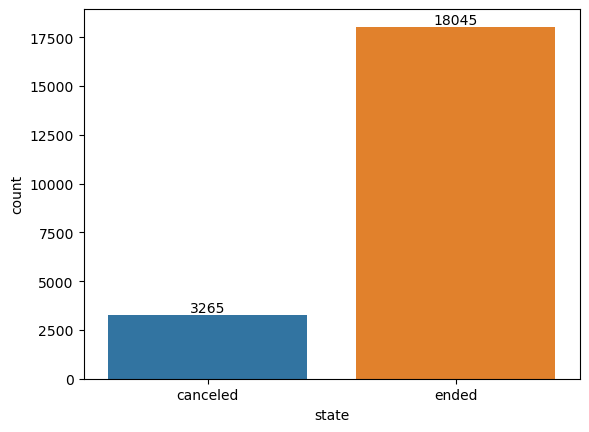

In [29]:
ax = sns.countplot(data=df, x='state')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [30]:
# Unique values of the column checkin_type

checkin_type_uv = df['checkin_type'].value_counts()
checkin_type_uv

checkin_type
mobile     17003
connect     4307
Name: count, dtype: int64

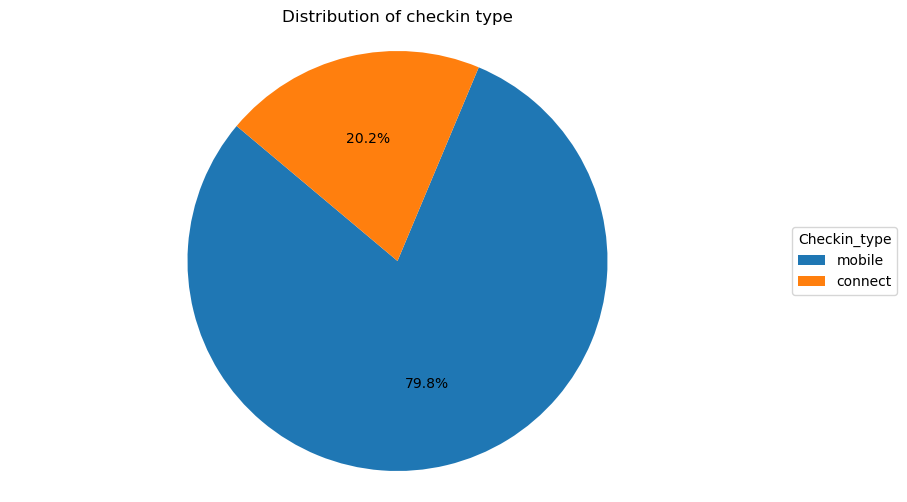

In [31]:

chackin_type_percentage = checkin_type_uv / checkin_type_uv.sum() * 100

fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(chackin_type_percentage, autopct='%1.1f%%', startangle=140)

ax.legend(wedges, chackin_type_percentage.index, title="Checkin_type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of checkin type')
plt.axis('equal')
plt.show()

We observe that most check-in methods are on mobile

c:\Users\yousr\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\yousr\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='delay_at_checkout_in_minutes'>

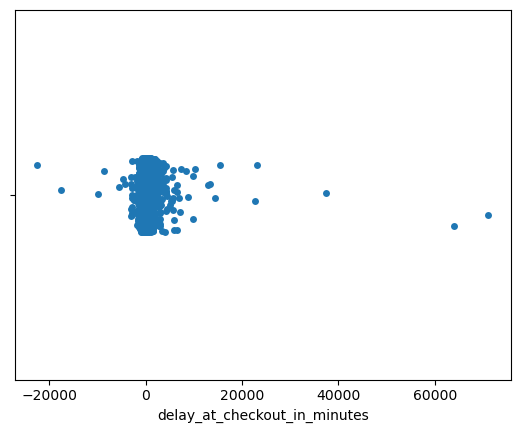

In [32]:
sns.stripplot(x=df['delay_at_checkout_in_minutes'])

The graph above shows the distribution of delays at checkout. Most rentals have a delay of around 0 minutes, with some outliers that are significantly late.

In [33]:
# Visualization of the number of late, on time and in advance checkouts per type of Check-in


# Filter and drop NaN values for both check-in types
df_mobile = df[df['checkin_type'] == 'mobile'].dropna(subset=['delay_at_checkout_in_minutes'])
df_connect = df[df['checkin_type'] == 'connect'].dropna(subset=['delay_at_checkout_in_minutes'])

# Define conditions and choices for checkout status
conditions_mobile = [
    (df_mobile['delay_at_checkout_in_minutes'] > 0),
    (df_mobile['delay_at_checkout_in_minutes'] == 0),
    (df_mobile['delay_at_checkout_in_minutes'] < 0)
]
choices = ['Delayed', 'On time', 'In advance']

df_mobile['checkout_status'] = np.select(conditions_mobile, choices)

conditions_connect = [
    (df_connect['delay_at_checkout_in_minutes'] > 0),
    (df_connect['delay_at_checkout_in_minutes'] == 0),
    (df_connect['delay_at_checkout_in_minutes'] < 0)
]

df_connect['checkout_status'] = np.select(conditions_connect, choices)


# Apply checkout status for both dataframes
df_mobile['checkout_status'] = np.select(conditions_mobile, choices)
df_connect['checkout_status'] = np.select(conditions_connect, choices)

# Add check-in type labels and combine dataframes
df_mobile['checkin_type'] = 'mobile'
df_connect['checkin_type'] = 'connect'
df_combined = pd.concat([df_mobile, df_connect])

# Group and count checkout status by check-in type
status_counts = df_combined.groupby(['checkin_type', 'checkout_status']).size().reset_index(name='Count')

# Create the bar chart
fig = px.bar(status_counts, x='checkout_status', y='Count', color='checkin_type',
             barmode='group', labels={'checkout_status': 'Checkout status', 'Count': 'Count', 'checkin_type': 'Check-in type'},
             title='Number of late, on time and in advance checkouts per type of Check-in',
             width=800, height=600)

fig.show()


## DATA ANALYSIS

Let's filter our dataset and clean it from missing values to use it for our analysis

In [34]:
# Missing values cleaning

df_new = df.dropna(subset='delay_at_checkout_in_minutes')
df_new.shape

(16346, 7)

Let's filter our dataset and remove outliers

In [35]:
# Filter positive values ​​of delay_at_checkout_in_minutes and calculate their maximum

positive_delays = df_new[df_new['delay_at_checkout_in_minutes'] > 0]['delay_at_checkout_in_minutes']

max_positive_delay = positive_delays.max()

print(f"The maximum of positive values ​​of delay_at_checkout_in_minutes : {max_positive_delay} minutes")

The maximum of positive values ​​of delay_at_checkout_in_minutes : 71084.0 minutes


In [36]:
# Determining outliers based on the delay_at_checkout_in_minutes column

# Calculate Q1 and Q3 :
Q1 = positive_delays.quantile(0.25)
Q3 = positive_delays.quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = positive_delays[(positive_delays < lower_bound) | (positive_delays > upper_bound)]

print(f"Outliers:\n{outliers}")

Outliers:
24       1452.0
94        780.0
99        933.0
102      1967.0
114      3233.0
          ...  
21155     564.0
21214    1108.0
21246     362.0
21258     735.0
21298     549.0
Name: delay_at_checkout_in_minutes, Length: 1052, dtype: float64


In [37]:
# Let's filter our dataset and remove outliers :

df_cleaned = df_new[
    (df_new['delay_at_checkout_in_minutes'] > 0) &  
    (df_new['delay_at_checkout_in_minutes'] >= lower_bound) &  
    (df_new['delay_at_checkout_in_minutes'] <= upper_bound) 
]

#### 1- Which share of our owner’s revenue would potentially be affected by the feature?

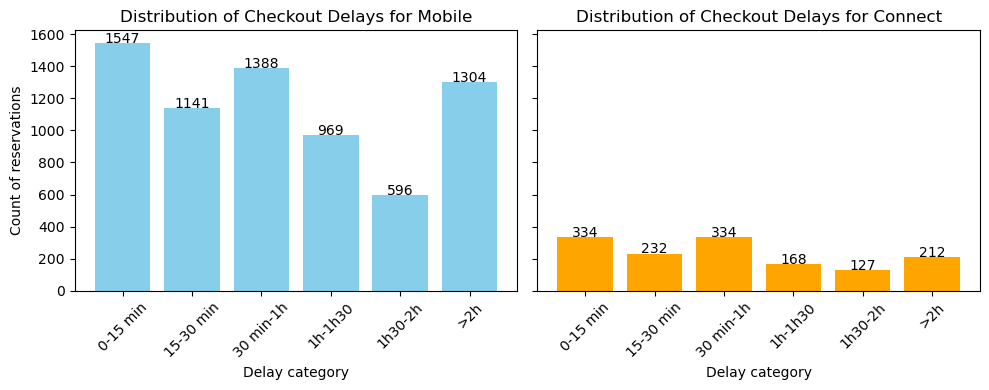

In [38]:
# Visualization of delays type per chekin type :

df_cleaned = df_cleaned[df_cleaned['delay_at_checkout_in_minutes'] > 0]

bins = [0, 15, 30, 60, 90, 120, float('inf')]
labels = ['0-15 min', '15-30 min', '30 min-1h', '1h-1h30', '1h30-2h', '>2h']

df_cleaned_mobile = df_cleaned[df_cleaned['checkin_type'] == 'mobile'].copy()
df_cleaned_connect = df_cleaned[df_cleaned['checkin_type'] == 'connect'].copy()

df_cleaned_mobile['delay_category'] = pd.cut(df_cleaned_mobile['delay_at_checkout_in_minutes'], bins=bins, labels=labels, right=False)
df_cleaned_connect['delay_category'] = pd.cut(df_cleaned_connect['delay_at_checkout_in_minutes'], bins=bins, labels=labels, right=False)

delay_category_counts_mobile = df_cleaned_mobile['delay_category'].value_counts().sort_index()
delay_category_counts_connect = df_cleaned_connect['delay_category'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].bar(delay_category_counts_mobile.index, delay_category_counts_mobile.values, color='skyblue')
axes[0].set_title('Distribution of Checkout Delays for Mobile')
axes[0].set_xlabel('Delay category')
axes[0].set_ylabel('Count of reservations')
axes[0].set_xticks(range(len(labels)))
axes[0].set_xticklabels(labels, rotation=45)
for index, value in enumerate(delay_category_counts_mobile):
    axes[0].text(index, value + 0.5, str(value), ha='center')

axes[1].bar(delay_category_counts_connect.index, delay_category_counts_connect.values, color='orange')
axes[1].set_title('Distribution of Checkout Delays for Connect')
axes[1].set_xlabel('Delay category')
axes[1].set_xticks(range(len(labels)))
axes[1].set_xticklabels(labels, rotation=45)
for index, value in enumerate(delay_category_counts_connect):
    axes[1].text(index, value + 0.5, str(value), ha='center')

plt.tight_layout()
plt.show()

For mobile, as for connect, the total number of delays under less than 2 hours is superior that the delays of more than 2 hours. But we can see that there are less delays for Connect.

Let's get a look at the cancellations

In [39]:
# Cancellation rate for each chekin type :

cancelled_checkins = df[df['state'] == 'canceled']['checkin_type'].value_counts()

total_checkins_df = df['checkin_type'].value_counts()

cancellation_rate = (cancelled_checkins / total_checkins_df) * 100
cancellation_rate = cancellation_rate.fillna(0)

print("Cancellation rate for each chekin type :")
print(cancellation_rate)

Cancellation rate for each chekin type :
checkin_type
mobile     14.509204
connect    18.527978
Name: count, dtype: float64


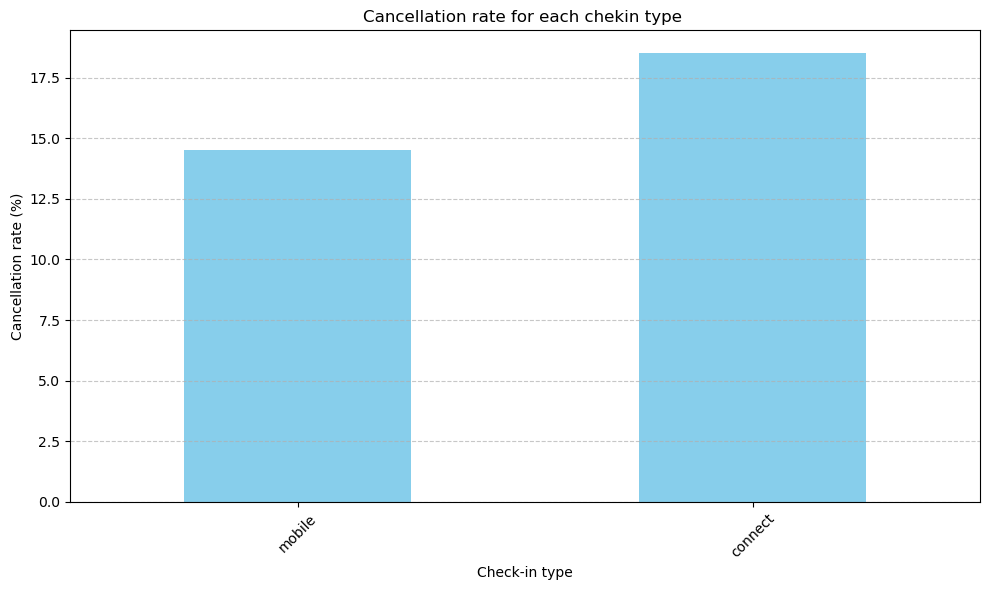

In [40]:
# Visualization :

plt.figure(figsize=(10, 6))
cancellation_rate.plot(kind='bar', color='skyblue')

plt.title('Cancellation rate for each chekin type ')
plt.xlabel('Check-in type')
plt.ylabel('Cancellation rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

From the 2 graphs, we can say that Connect owners will be affected the most by the feature because they already have less delays but have more cancellation compared to Mobile owners.

#### 2- How many rentals would be affected by the feature depending on the threshold and scope we choose?

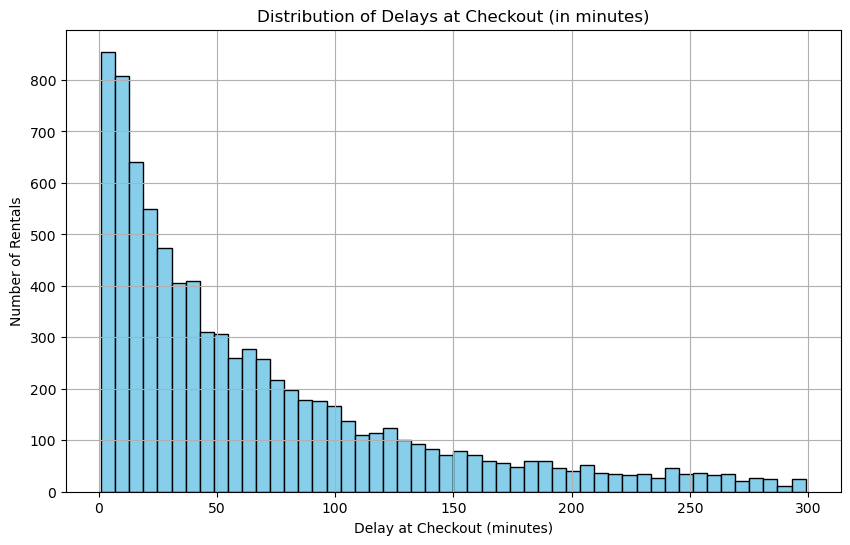

In [42]:
# Plot the distribution of delays
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['delay_at_checkout_in_minutes'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Delays at Checkout (in minutes)')
plt.xlabel('Delay at Checkout (minutes)')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()


The histogram above shows the distribution of delays at checkout. Most rentals have a delay of around 0 minutes, with some outliers that are significantly late.

Let's calculate the number of rentals that would be affected based on different delay thresholds.

In [44]:
# Define different delay thresholds (in minutes)
thresholds = [0, 15, 30, 60, 120]

# Calculate the number of rentals that exceed each threshold
affected_rentals = {}
for threshold in thresholds:
    affected_count = df_cleaned[df_cleaned['delay_at_checkout_in_minutes'] > threshold].shape[0]
    affected_rentals[threshold] = affected_count

# Convert to DataFrame for easier visualization
affected_rentals_df = pd.DataFrame(list(affected_rentals.items()), columns=['Threshold (minutes)', 'Number of Affected Rentals'])

# Display the DataFrame
print(affected_rentals_df)


   Threshold (minutes)  Number of Affected Rentals
0                    0                        8352
1                   15                        6364
2                   30                        5026
3                   60                        3334
4                  120                        1501


Now we have a data showing the number of rentals affected by different delay thresholds that will help us assess the impact of the feature based on the threshold chosen.

#### 3- How often are drivers late for the next check-in? How does it impact the next driver?


In [45]:
# Filter cases where time_delta_with_previous_rental_in_minutes and delay_at_checkout_in_minutes are both available
df_delay_analysis = df_cleaned[(df_cleaned['time_delta_with_previous_rental_in_minutes'].notna()) & 
                       (df_cleaned['delay_at_checkout_in_minutes'].notna())]

# Identify cases where the delay at checkout exceeds or equals the time difference between rentals
impacted_rentals = df_delay_analysis[df_delay_analysis['delay_at_checkout_in_minutes'] >= 
                                     df_delay_analysis['time_delta_with_previous_rental_in_minutes']]

# Calculate the number of impacted rentals
num_impacted_rentals = impacted_rentals.shape[0]

# Calculate the percentage of impacted rentals
percentage_impacted_rentals = (num_impacted_rentals / df_delay_analysis.shape[0]) * 100

num_impacted_rentals, percentage_impacted_rentals


(213, 29.058663028649384)

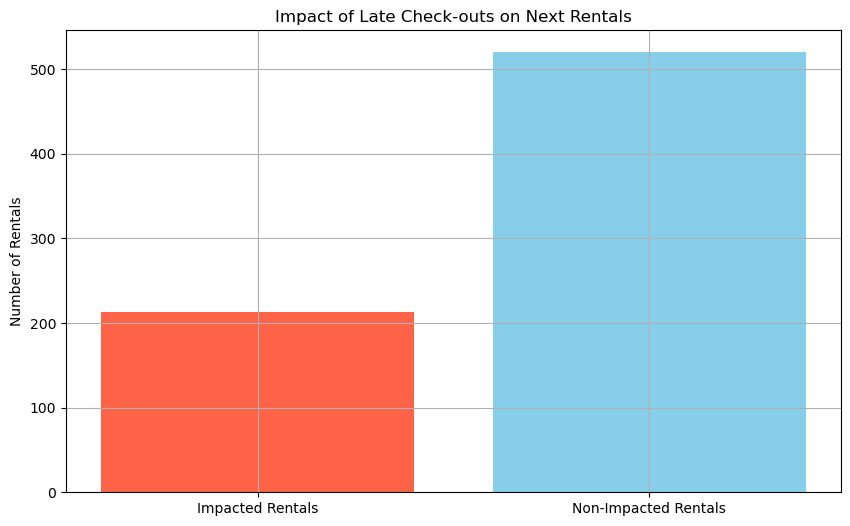

In [46]:
# Impacted Rentals due to Late Check-ins
plt.figure(figsize=(10, 6))
plt.bar(['Impacted Rentals', 'Non-Impacted Rentals'], 
        [num_impacted_rentals, df_delay_analysis.shape[0] - num_impacted_rentals], 
        color=['tomato', 'skyblue'])
plt.title('Impact of Late Check-outs on Next Rentals')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

Out of the rentals where the timing between rentals is relevant, approximately 213 rentals (or 29.05%) experienced a delay at checkout that likely impacted the next driver.

#### 4- How many problematic cases will it solve depending on the chosen threshold and scope?

In [48]:
# Calculate the number of problematic cases solved by each threshold
solved_cases = {}
for threshold in thresholds:
    solved_count = impacted_rentals[impacted_rentals['delay_at_checkout_in_minutes'] <= threshold].shape[0]
    solved_cases[threshold] = solved_count

# Convert to DataFrame for easier visualization
solved_cases_df = pd.DataFrame(list(solved_cases.items()), columns=['Threshold (minutes)', 'Problematic Cases Solved'])

# Display the DataFrame
print(solved_cases_df)


   Threshold (minutes)  Problematic Cases Solved
0                    0                         0
1                   15                        29
2                   30                        46
3                   60                        95
4                  120                       151


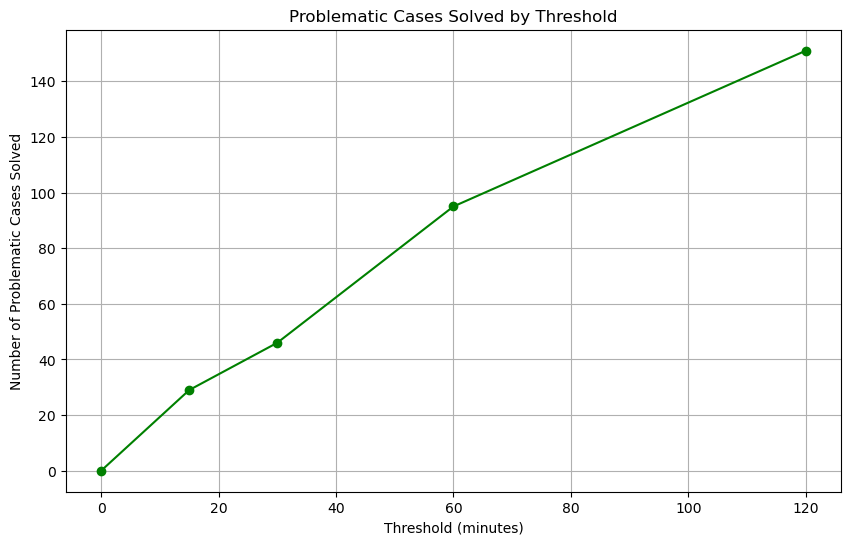

In [49]:
# Problematic Cases Solved by Threshold
plt.figure(figsize=(10, 6))
plt.plot(solved_cases_df['Threshold (minutes)'], solved_cases_df['Problematic Cases Solved'], marker='o', color='green')
plt.title('Problematic Cases Solved by Threshold')
plt.xlabel('Threshold (minutes)')
plt.ylabel('Number of Problematic Cases Solved')
plt.grid(True)
plt.show()

#### CONCLUSION :
* This information will help you understand the potential effectiveness of the chosen threshold in resolving the issue of late checkouts.
* But the choice of the threshold really depends on the company's goals and expectations, do they want to keep more rentals possible or play on improving the impacts caused by vehicle returns.
* Also, if the delay increases > the turnover will decrease.